# Exploring Descriptive Statistics

## **Introduction**
Descriptive statistics provide essential tools to summarize and understand data. They include measures of central tendency, variability, and distribution shape. In this notebook, we'll explore these concepts using the "Students Performance in Exams" dataset.

### **Key Concepts**:
- **Mean**: The average of a set of numbers, calculated as:

  $$
  \text{Mean} = \frac{\sum_{i=1}^n x_i}{n}
  $$
  where $(x_i)$ are the data points and $(n)$ is the number of data points.

- **Median**: The middle value when the numbers are sorted. If $(n)$ is odd, it is the middle value; if $(n)$ is even, it is the average of the two middle values.

- **Mode**: The most frequently occurring value in a dataset.

- **Variance**: The average squared deviation from the mean, measuring spread:
  $$
  \text{Variance} = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n}
  $$
  where $(\mu)$ is the mean.

- **Standard Deviation**: The square root of variance, representing spread in the same units as the data:
  $$
  \text{Standard Deviation} = \sqrt{\text{Variance}}
  $$

- **Percentiles and Quartiles**: Values dividing the data into 100 or 4 equal parts, respectively. For example, the 25th percentile (Q1) represents the value below which 25% of data lies.

- **Skewness**: A measure of data asymmetry:
  $$
  \text{Skewness} = \frac{\sum_{i=1}^n (x_i - \mu)^3}{n \cdot \sigma^3}
  $$
  where $(\sigma)$ is the standard deviation.

- **Kurtosis**: A measure of whether data tails are heavy or light compared to a normal distribution:
  $$
  \text{Kurtosis} = \frac{\sum_{i=1}^n (x_i - \mu)^4}{n \cdot \sigma^4} - 3
  $$


## **Dataset**
We'll use the **"Students Performance in Exams"** dataset available on Kaggle.

**Dataset Link**: [https://www.kaggle.com/spscientist/students-performance-in-exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

**Columns of Interest**:
- **`math score`**: Numerical, representing the score obtained by students in mathematics.
- **`reading score`**: Numerical, representing the score obtained by students in reading.
- **`writing score`**: Numerical, representing the score obtained by students in writing.
- **`gender`**: Categorical, representing the gender of the student (e.g., male, female).
- **`parental level of education`**: Categorical, indicating the highest level of education achieved by the student’s parents.


## **Loading the Dataset**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data_url = "../datasets/StudentsPerformance.csv"
df = pd.read_csv(data_url)

In [3]:
# Display the first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **Exercises**

### **Exercise 1: Data Overview**
**Question**: 
What are the data types of the columns? How many unique values are present in categorical columns?


In [4]:
df.info() #provides the information related to each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
print(f'Number of unique values present in {'Gender'} : {df['gender'].nunique()}') # counts unique values

print(df.gender.unique()) # print the unique values of a column

print(f'Number of unique values present in column parental level of education are : {df['parental level of education'].nunique()}')

print(df['parental level of education'].unique())

Number of unique values present in Gender : 2
['female' 'male']
Number of unique values present in column parental level of education are : 6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


### **Exercise 2: Mean, Median, Mode**
**Scenario**: 
A teacher wants to understand how her class performed in the math exam.

**Question**: 
- What are the mean, median, and mode of the `math score`?


In [6]:
# so here mean helps to determine the avg of whole class
mean_of_class = df['math score'].mean()
print(f'Avg of class is: {round(mean_of_class, 2)}')

#whereas median helps the teacher to grade people who belong to top 50% and who belong to last 50%  as median is middle value
median_of_class = df['math score'].median()
print(f'50th percentile of class is : {median_of_class}')
# mode helps to identify the most scored score or repeatedly scored value in a group of scores
mode_of_class = df['math score'].mode()
print(f'Frequent got score was: {mode_of_class}')

Avg of class is: 66.09
50th percentile of class is : 66.0
Frequent got score was: 0    65
Name: math score, dtype: int64


### **Exercise 3: Variance and Standard Deviation**
**Scenario**: 
The school principal wants to know how consistent students are in their reading scores.

**Question**: 
- Calculate the variance and standard deviation for `reading score`.


In [15]:
# variance helps to identify how the data is spread across the axis mean
student_score_consistency = df['reading score'].var(skipna=True, ddof=1)

print(f"The Variance of Student scores are: {round(student_score_consistency, 2)}")

#how each individual score is deviated from mean score. 
student_score_deviation = df['reading score'].std()

print(f"The standard deviation of student reading scores are: {round(student_score_deviation,2)}")

The Variance of Student scores are: 213.17
The standard deviation of student reading scores are: 14.6


### **Exercise 4: Percentiles and Quartiles**
**Scenario**: 
The school counselor wants to identify the top 25% of students based on their writing scores.

**Questions**: 
- What are the 25th, 50th (median), and 75th percentiles for `writing score`?
- How would you identify students in the top 25%?


In [19]:
#these quantiles divide data into percentage or parts based on how we want 
print(f'''The 25th percentile is : {df["writing score"].quantile(0.25)}, 
    The 50th percentile is: {df["writing score"].quantile(0.5)}, 
    The 75th percentile is: {df["writing score"].quantile(0.75)}'''
)

The 25th percentile is : 57.75, 
    The 50th percentile is: 69.0, 
    The 75th percentile is: 79.0


In [23]:
# students in first 25% are 
top_25 = df[df["writing score"] <= df["writing score"].quantile(0.25)]

print(f"Number of students in top 25% are: {top_25.shape[0]}")

Number of students in top 25% are: 250


In [24]:
top_25.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
9,female,group B,high school,free/reduced,none,38,60,50
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43


### **Exercise 5: Skewness and Kurtosis**
**Scenario**: 
The head of the education board wants to understand the shape of the distribution of students' total scores.

**Questions**: 
- Calculate the skewness and kurtosis of `total score`.
- Is the distribution symmetric, skewed, or heavy/light-tailed?


In [26]:
# skew measure the data distribution over the axis, right or left 
# where 0 being symmetrical, +ve being right , and -ve being left 

df["total score"] = df['math score'] + df['reading score'] + df['writing score']

print(f'The Skewness of total score is : {df["total score"].skew()}')

The Skewness of total score is : -0.2990571175016888


In [28]:
#kkurtosis tells us how sharp or smooth the curve is the normal range would be 3 for normal distribution
# if more than three then sharp on top and fat on either sides
# if less than 3 than smooth and flat on sides 

print(f'The Kurtosis of total score is: {df["total score"].kurt()}')

The Kurtosis of total score is: 0.12584287362370716


### **Exercise 6: Visualizations**
**Question**: 
Create visualizations to explore the distribution of `math score`, `reading score`, and `writing score`. Which distribution appears the most skewed?


In [33]:
#Math Score Appeared more skewed as it was more sharp and less fat on side compared to other two. 

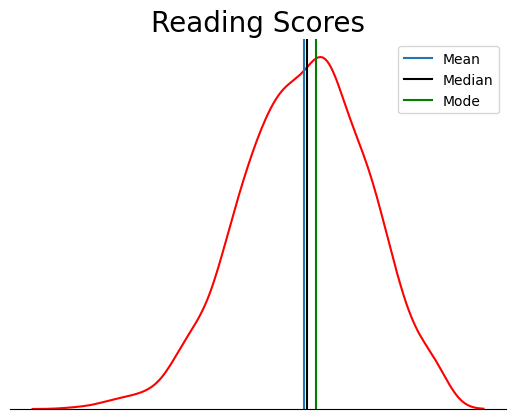

In [30]:
sns.kdeplot(df['reading score'], color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("Reading Scores", fontdict=dict(fontsize=20))

# Find the mean, median, mode
mean_score = df["reading score"].mean()
median_score = df["reading score"].median()
mode_score = df["reading score"].mode().squeeze()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_score, label="Mean")
plt.axvline(median_score, color="black", label="Median")
plt.axvline(mode_score, color="green", label="Mode")

plt.legend();


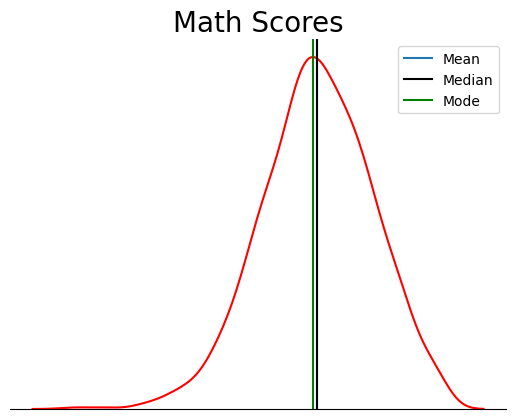

In [31]:
sns.kdeplot(df['math score'], color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("Math Scores", fontdict=dict(fontsize=20))

# Find the mean, median, mode
mean_score = df["math score"].mean()
median_score = df["math score"].median()
mode_score = df["math score"].mode().squeeze()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_score, label="Mean")
plt.axvline(median_score, color="black", label="Median")
plt.axvline(mode_score, color="green", label="Mode")

plt.legend();


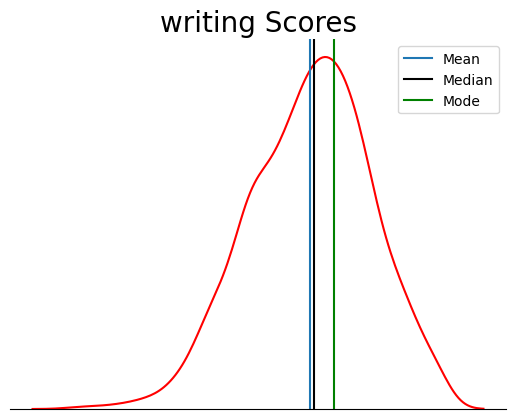

In [32]:
sns.kdeplot(df['writing score'], color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("writing Scores", fontdict=dict(fontsize=20))

# Find the mean, median, mode
mean_score = df["writing score"].mean()
median_score = df["writing score"].median()
mode_score = df["writing score"].mode().squeeze()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_score, label="Mean")
plt.axvline(median_score, color="black", label="Median")
plt.axvline(mode_score, color="green", label="Mode")

plt.legend();

### **Exercise 7: Gender Analysis**
**Scenario**: 
The school wants to explore if gender impacts performance.

**Questions**: 
- What is the average `math score`, `reading score`, and `writing score` for each gender?
- Which gender performs better on average in each subject?


In [37]:
print(f'The Average math score for each gender is {round(df.groupby('gender')["math score"].mean(), 2)}')

The Average math score for each gender is gender
female    63.63
male      68.73
Name: math score, dtype: float64


In [38]:
print(f'The Average reading score for each gender is {round(df.groupby('gender')["reading score"].mean(), 2)}')

The Average reading score for each gender is gender
female    72.61
male      65.47
Name: reading score, dtype: float64


In [39]:
print(f'The Average writing score for each gender is {round(df.groupby('gender')["writing score"].mean(), 2)}')

The Average writing score for each gender is gender
female    72.47
male      63.31
Name: writing score, dtype: float64


In [40]:
# on average female group performed better than male group.

### **Exercise 8: Parental Education Analysis**
**Scenario**: 
The school wants to understand the influence of parental education on student performance.

**Questions**: 
- What is the average score in each subject for different levels of parental education?
- Which education level correlates with the highest average scores?


In [41]:
print(f'''The Average scores for each parental level is 
{round(df.groupby('parental level of education')[["math score", "reading score", "writing score"]].mean(), 2)}
''')

The Average scores for each parental level is 
                             math score  reading score  writing score
parental level of education                                          
associate's degree                67.88          70.93          69.90
bachelor's degree                 69.39          73.00          73.38
high school                       62.14          64.70          62.45
master's degree                   69.75          75.37          75.68
some college                      67.13          69.46          68.84
some high school                  63.50          66.94          64.89



### **Exercise 9: Outlier Detection**
**Question**: 
Are there any outliers in the `math score`? Use a boxplot to visualize and calculate the Interquartile Range (IQR).


In [48]:
# Inter quantile range 
q1 = df["math score"].quantile(0.25)
q3 = df["math score"].quantile(0.75)

iqr = q3 - q1 

upper_bond = q3 + 1.5 * iqr
lower_bond = q1 - 1.5 * iqr

outliers = df[(df["math score"] < lower_bond) | (df["math score"] > upper_bond)]

print(outliers[["gender", "parental level of education", "math score", "reading score", "writing score"]].to_string())

     gender parental level of education  math score  reading score  writing score
17   female            some high school          18             32             28
59   female            some high school           0             17             10
145  female                some college          22             39             33
338  female            some high school          24             38             27
466  female          associate's degree          26             31             38
787  female                some college          19             38             32
842  female                 high school          23             44             36
980  female                 high school           8             24             23


<Axes: >

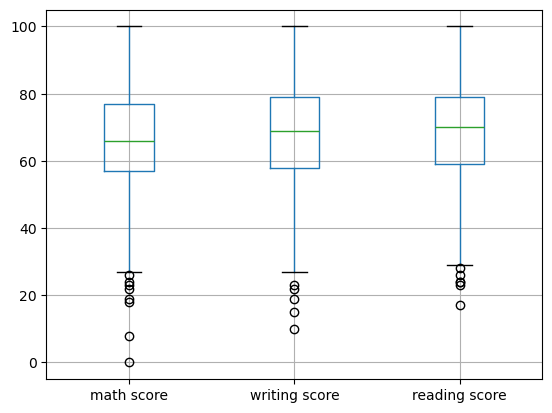

In [50]:
df.boxplot(column=['math score', 'writing score', 'reading score']) 

### **Exercise 10: Correlation Analysis**
**Question**: 
Is there a correlation between `math score`, `reading score`, and `writing score`? Visualize using a heatmap and calculate correlation coefficients.


In [51]:
correlation_matrix = df[["math score", "reading score", "writing score"]].corr()

print(correlation_matrix)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


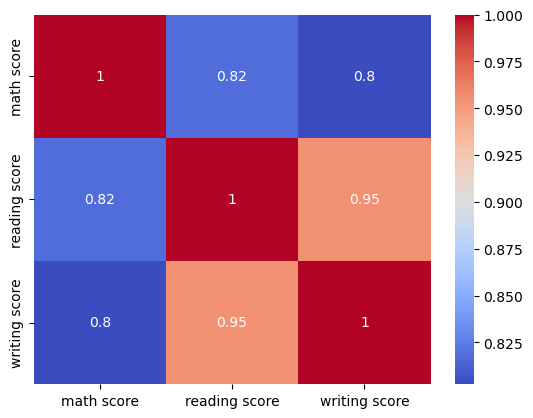

In [54]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Bonus:

In [56]:
#gathers all the numerical data and provides all the descriptive stats in one command to get an overview
df.describe()

,math score,reading score,writing score,total score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


## **Conclusion**
Descriptive statistics provide valuable insights into datasets by summarizing key properties. By practicing these exercises, you should now be more familiar with fundamental statistical techniques and their applications to real-world data.
